In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data.loader import load_prices, compute_returns
from src.optimization.markowitz import minimize_volatility
from src.optimization.sharpe import maximize_sharpe
from src.optimization.markowitz import minimize_volatility, portfolio_return, portfolio_volatility


In [2]:
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA", "WEGE3.SA", "B3SA3.SA", "MGLU3.SA", "GGBR4.SA"] # PETR4, VALE3, ITUB4, BBDC4, BBAS3, ABEV3, WEGE3, B3SA3, MGLU3, GGBR4
start_date = "2019-01-01"
end_date = "2023-01-01"
target_return = 0.01
risk_free_rate = 0.15

In [3]:
prices = load_prices(tickers, start=start_date, end=end_date)
daily_returns = compute_returns(prices)
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()


/workspaces/deep_learning_finance/src/data/loader.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start, end=end)['Close']


[*********************100%***********************]  10 of 10 completed


In [4]:
type(mean_returns)

pandas.core.series.Series

In [5]:
#print(daily_returns)
print("\n--------------------\n")
print(mean_returns)


--------------------

Ticker
ABEV3.SA    0.000257
B3SA3.SA    0.000874
BBAS3.SA    0.000251
BBDC4.SA   -0.000065
GGBR4.SA    0.001359
ITUB4.SA   -0.000017
MGLU3.SA    0.000080
PETR4.SA    0.001202
VALE3.SA    0.001250
WEGE3.SA    0.001850
dtype: float64


In [6]:
cov_matrix

Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GGBR4.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,,
ABEV3.SA,0.000431,0.000248,0.000254,0.000256,0.000207,0.000231,0.000265,0.000253,0.000112,0.000212
B3SA3.SA,0.000248,0.000763,0.000417,0.000368,0.000322,0.000324,0.000608,0.000390,0.000233,0.000344
BBAS3.SA,0.000254,0.000417,0.000677,0.000514,0.000369,0.000434,0.000426,0.000521,0.000293,0.000237
BBDC4.SA,0.000256,0.000368,0.000514,0.000597,0.000335,0.000460,0.000346,0.000439,0.000264,0.000198
GGBR4.SA,0.000207,0.000322,0.000369,0.000335,0.000818,0.000291,0.000360,0.000484,0.000524,0.000298
ITUB4.SA,0.000231,0.000324,0.000434,0.000460,0.000291,0.000482,0.000295,0.000367,0.000213,0.000186
MGLU3.SA,0.000265,0.000608,0.000426,0.000346,0.000360,0.000295,0.001660,0.000424,0.000283,0.000425
PETR4.SA,0.000253,0.000390,0.000521,0.000439,0.000484,0.000367,0.000424,0.000901,0.000399,0.000284
VALE3.SA,0.000112,0.000233,0.000293,0.000264,0.000524,0.000213,0.000283,0.000399,0.000732,0.000180


In [7]:
weights_markowitz = minimize_volatility(mean_returns, cov_matrix, target_return)




In [8]:
risk_free_rate_annual = 0.15
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1

weights_sharpe = maximize_sharpe(mean_returns, cov_matrix, risk_free_rate=risk_free_rate_daily)

In [9]:
type(weights_markowitz)

numpy.ndarray

In [10]:
weights_markowitz

array([3.88517181e-01, 5.36700615e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.20972326e-01, 1.95156391e-18, 4.22838847e-18,
       2.16617103e-01, 1.68526383e-01])

In [11]:
type(weights_sharpe)

numpy.ndarray

In [12]:
weights_sharpe

array([0.00000000e+00, 0.00000000e+00, 3.01256546e-17, 1.10173875e-17,
       1.59410015e-16, 3.61152964e-18, 6.21295879e-17, 0.00000000e+00,
       2.12894455e-01, 7.87105545e-01])

### Chart plot - Markowitz

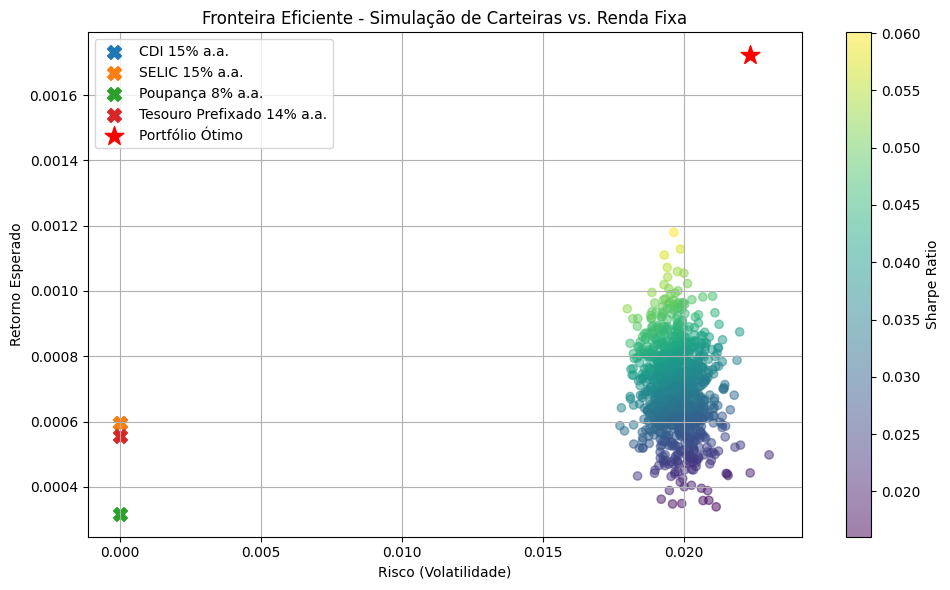

In [13]:
from outputs.charts.markowitz_plot import plot_efficient_frontier


plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights=weights_sharpe) # esse mean_returns tem que ser (pd.Series)

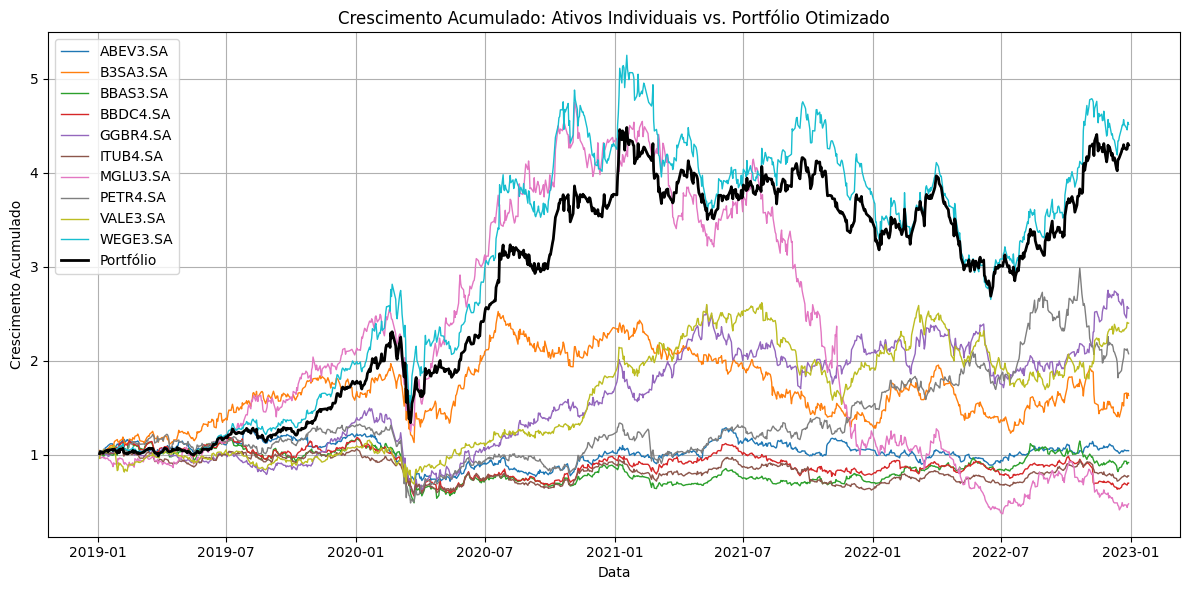

In [14]:
from outputs.charts.markowitz_plot import plot_time_serie


plot_time_serie(daily_returns, optimized_weights=weights_sharpe) # esse mean_returns tem que ser pd.DataFrame

In [15]:
import numpy as np

sharpe_individual = (mean_returns - risk_free_rate_daily) / np.sqrt(np.diag(cov_matrix))
print(sharpe_individual.sort_values(ascending=False))


Ticker
WEGE3.SA    0.050614
GGBR4.SA    0.028100
VALE3.SA    0.025713
PETR4.SA    0.021545
B3SA3.SA    0.011564
MGLU3.SA   -0.011656
BBAS3.SA   -0.011680
ABEV3.SA   -0.014349
BBDC4.SA   -0.025384
ITUB4.SA   -0.026044
dtype: float64


In [16]:
ret_sharpe = portfolio_return(weights_sharpe, mean_returns)
vol_sharpe = portfolio_volatility(weights_sharpe, cov_matrix)
sharpe_ratio = (ret_sharpe - risk_free_rate_daily) / vol_sharpe

print("Retorno:", ret_sharpe)
print("Volatilidade:", vol_sharpe)
print("Sharpe Ratio:", sharpe_ratio)


Retorno: 0.0017219790689187425
Volatilidade: 0.022339642839899795
Sharpe Ratio: 0.05224856860026463


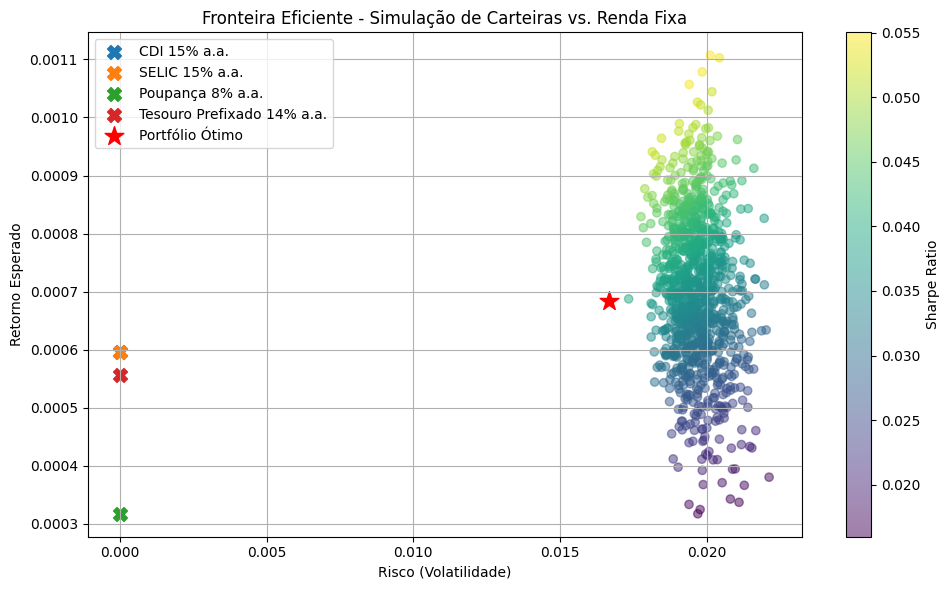

In [17]:

plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights=weights_markowitz) # esse mean_returns tem que ser (pd.Series)


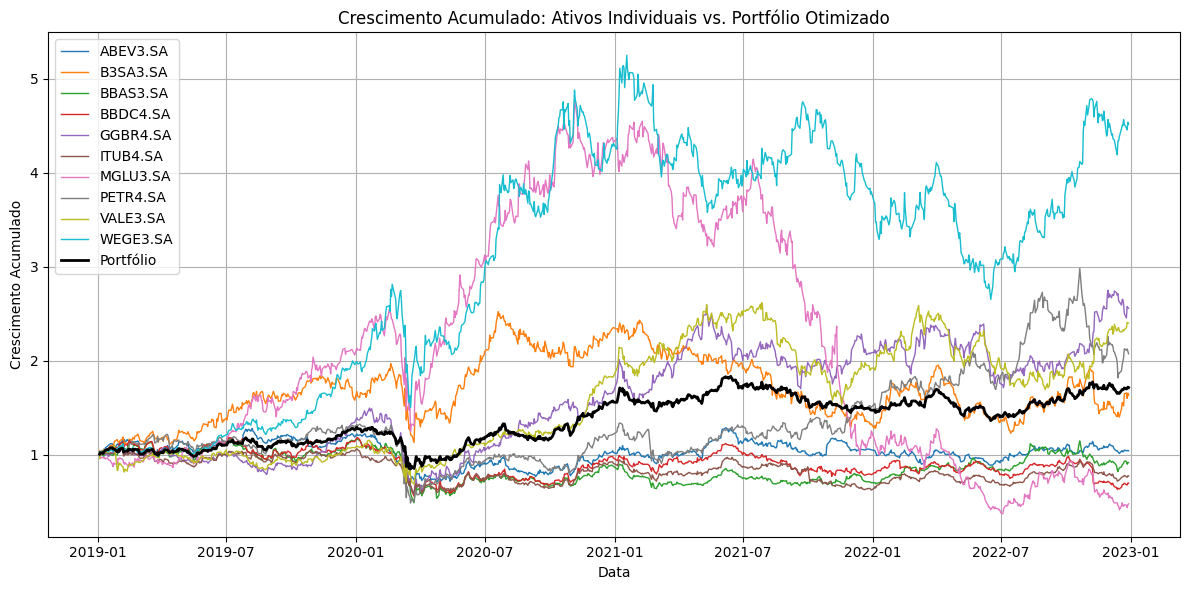

In [18]:
plot_time_serie(daily_returns, optimized_weights=weights_markowitz) # esse mean_returns tem que ser pd.DataFrame
